In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pickle

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                     'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()
print('COUNT NO OF NULL IN EACH COLUMN','\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
COUNT NO OF NULL IN EACH COLUMN 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


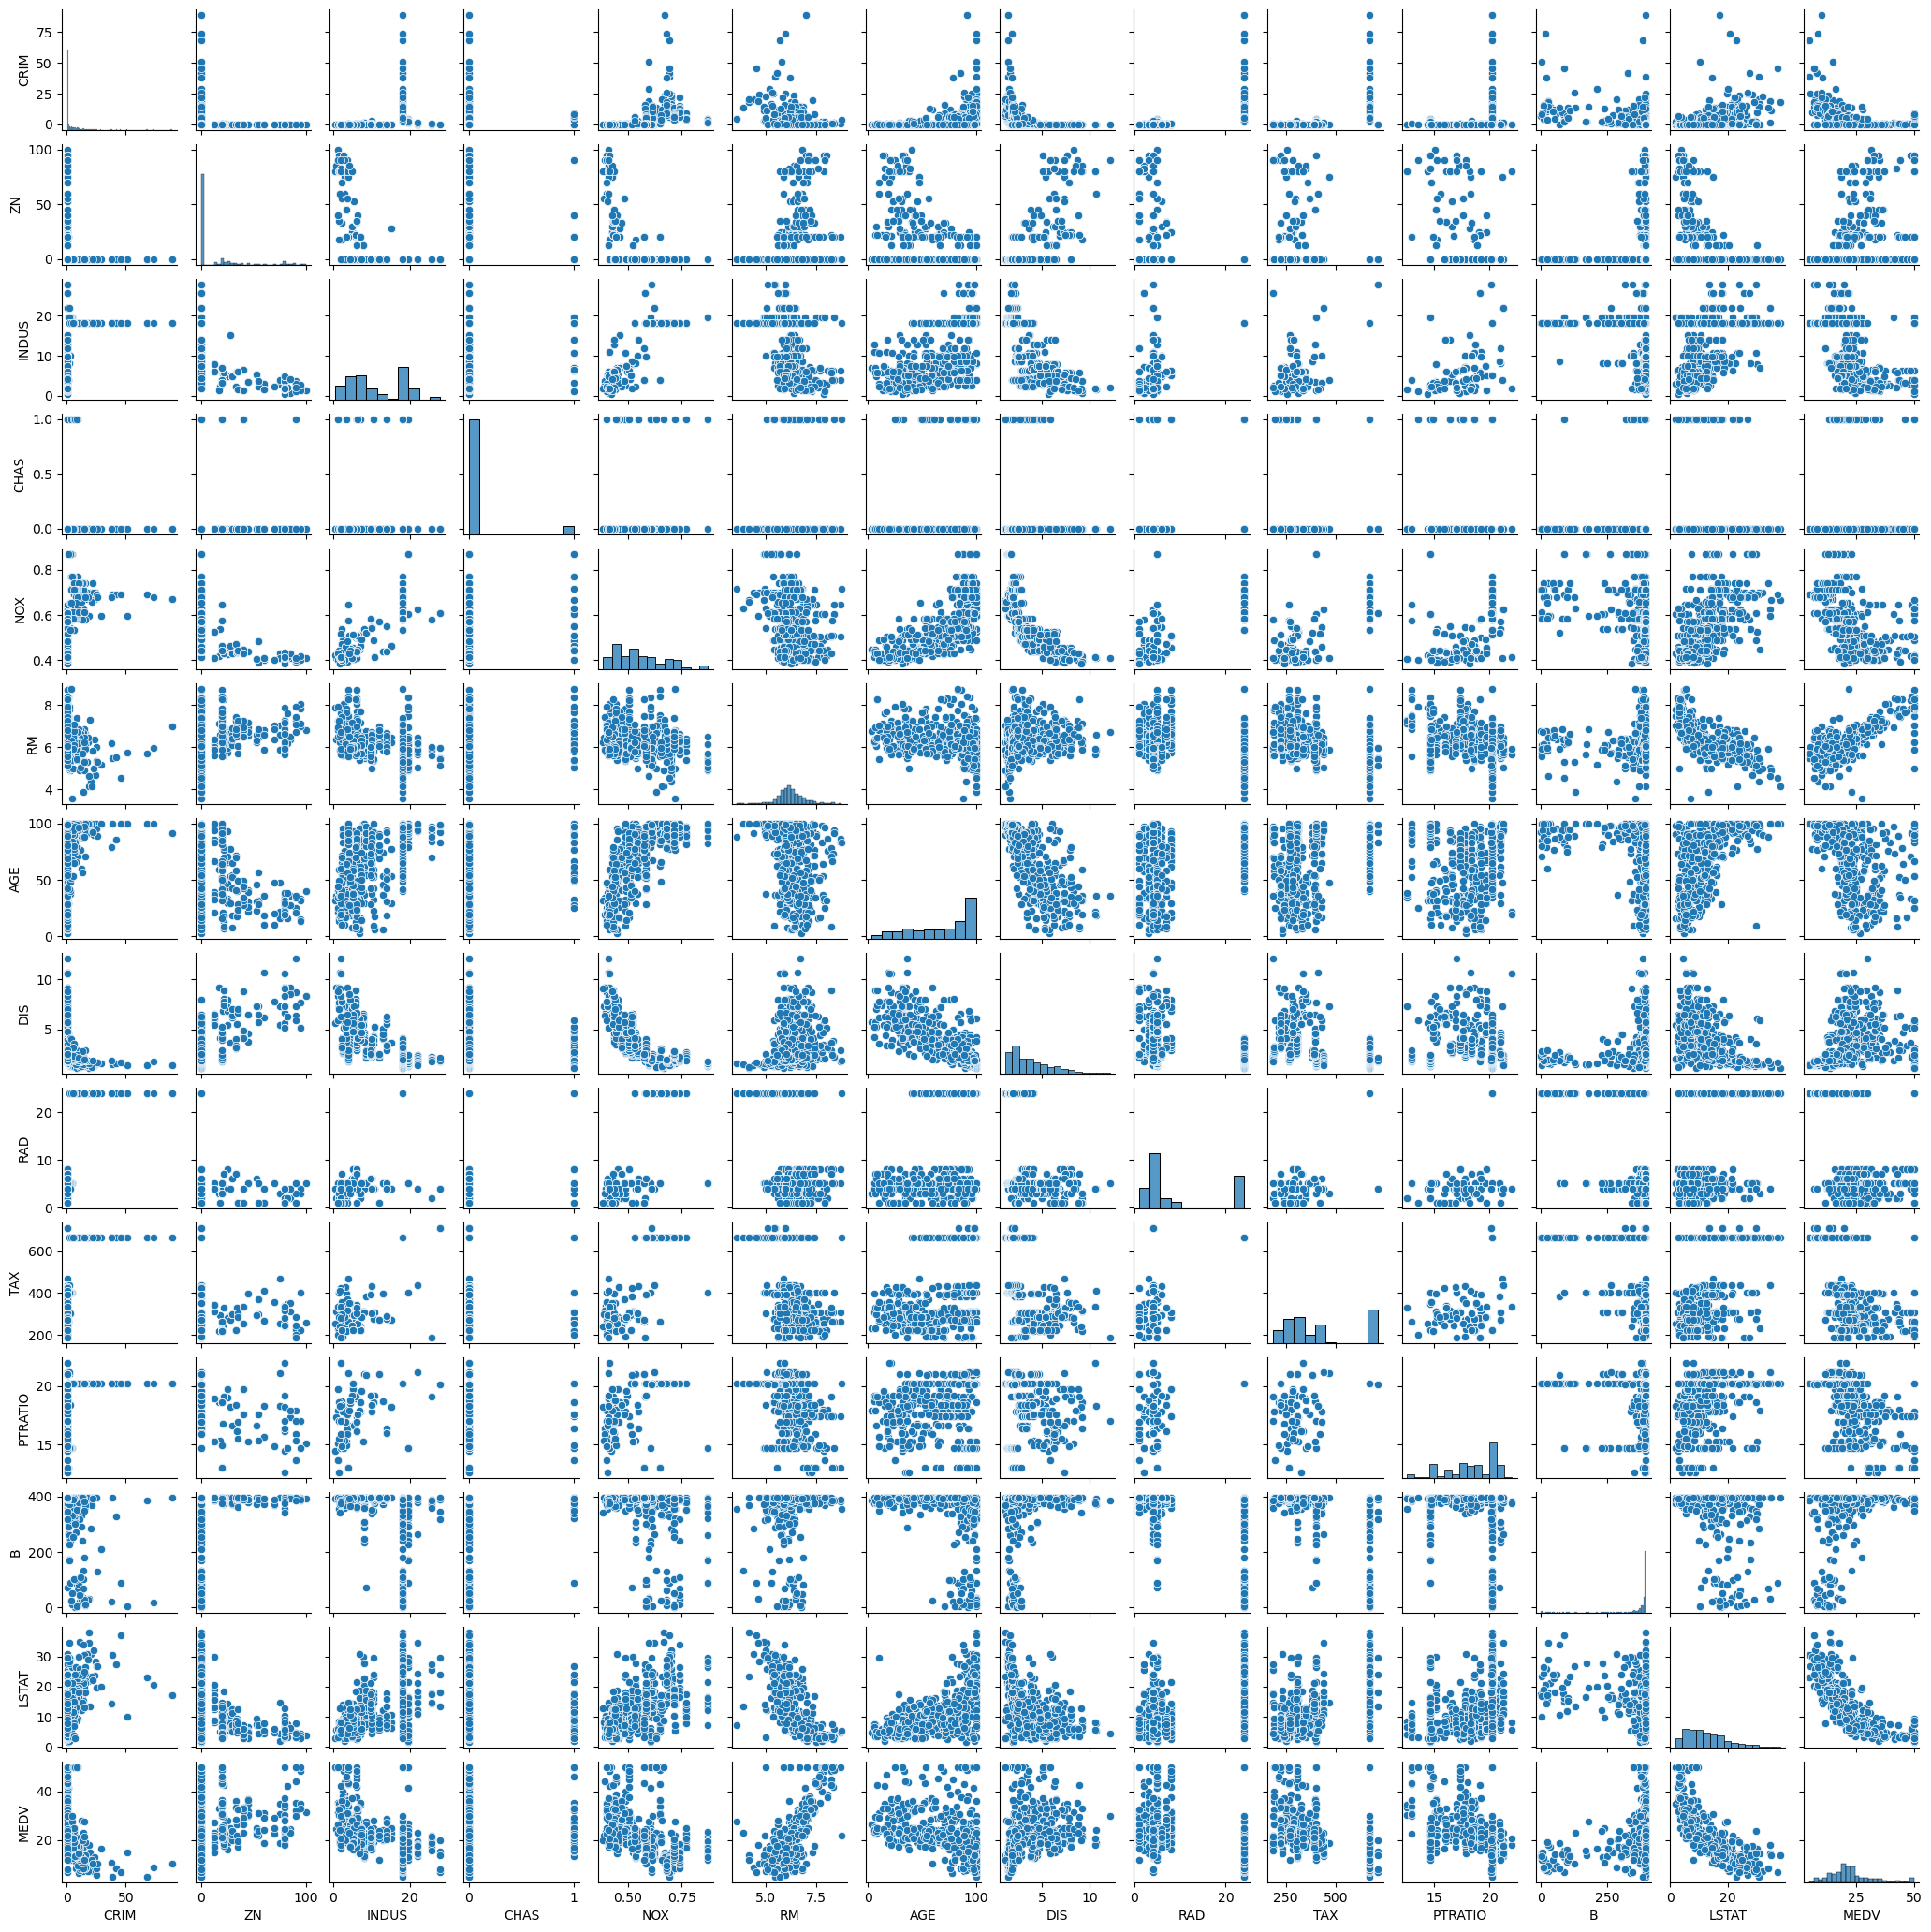

In [5]:
sns.pairplot(df, height = 1.5)
plt.show()

In [6]:
col_study = ['ZN', 'INDUS', 'NOX', 'RM']

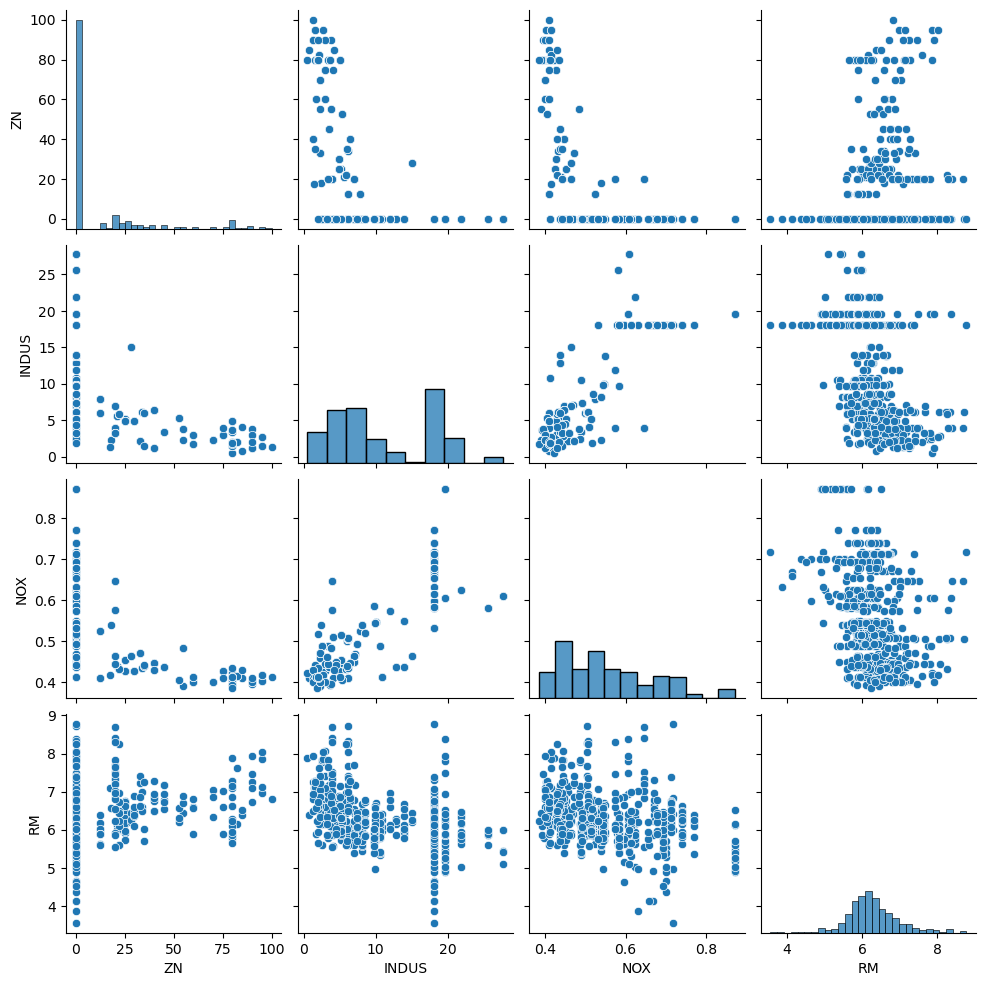

In [7]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

In [8]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

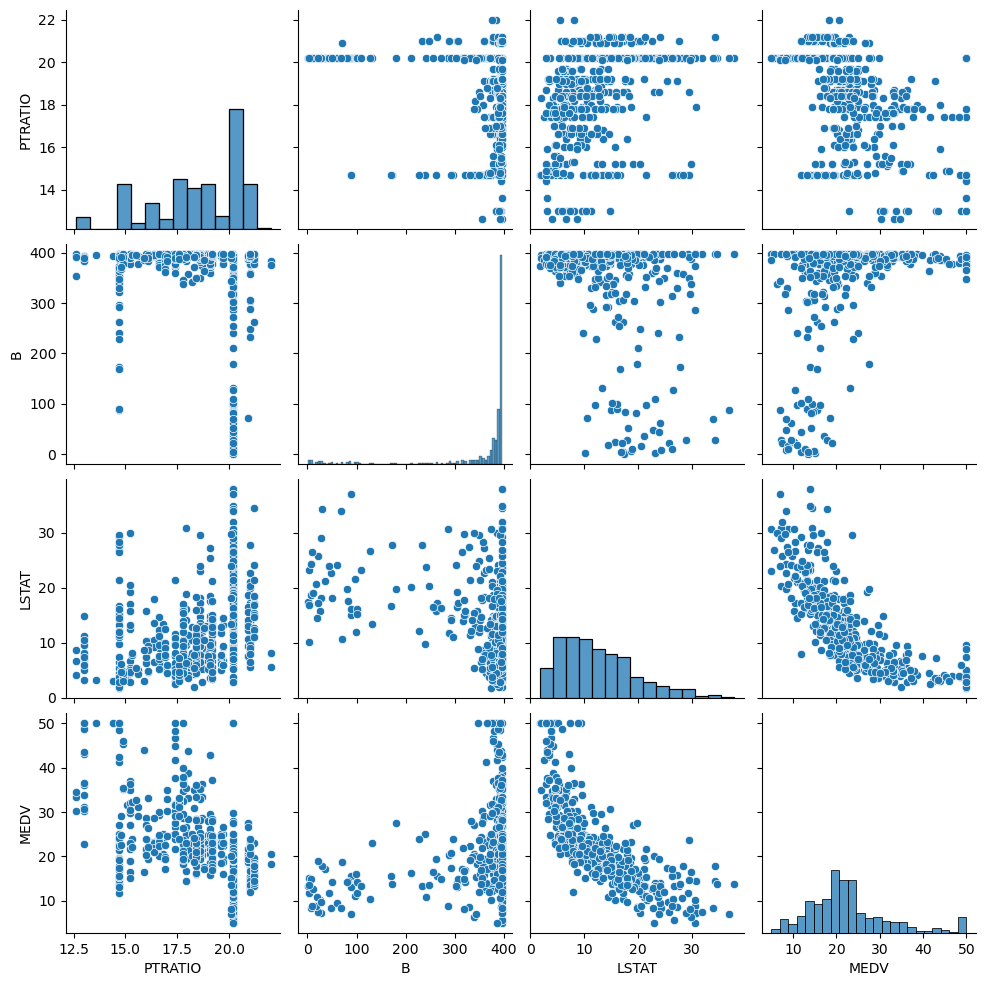

In [9]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

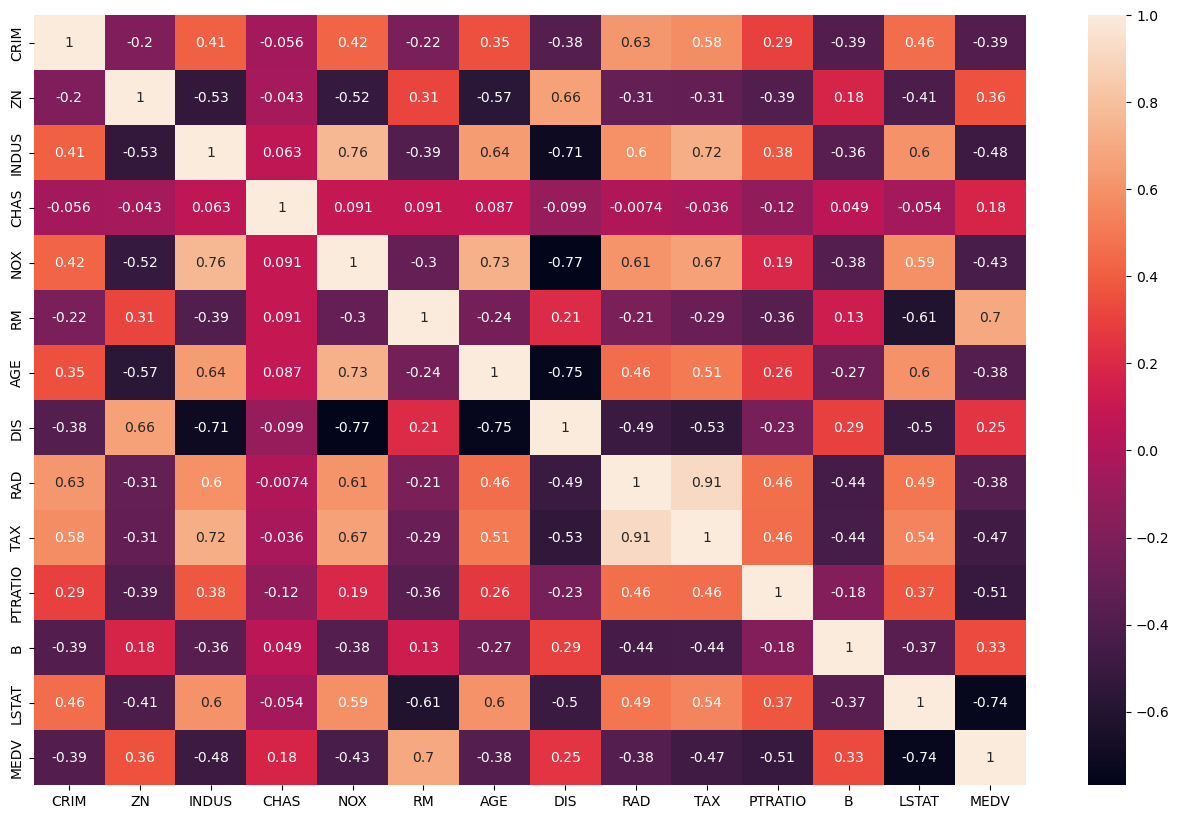

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
df.corr().nlargest(15,'MEDV')['MEDV']

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [12]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500, criterion='friedman_mse',random_state=42, n_jobs=-1)

forest.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_estimators=500, n_jobs=-1,
                      random_state=42)

In [16]:
y_train_pred = forest.predict(X_train)

y_test_pred = forest.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

print('MEAN SQUARED ERROR FOR train: {0:.4f}'.format(mean_squared_error(y_train, y_train_pred)))

print('MEAN SQUARED ERROR FOR TEST: {0:.4f}'.format(mean_squared_error(y_test, y_test_pred)))

MEAN SQUARED ERROR FOR train: 1.8662
MEAN SQUARED ERROR FOR TEST: 9.4416


In [18]:
from sklearn.metrics import r2_score

print('R^2 FOR train: {0:.4f}'.format(r2_score(y_train, y_train_pred)))

print('R^2 FOR TEST: {0:.4f}'.format(r2_score(y_test, y_test_pred)))

R^2 FOR train: 0.9788
R^2 FOR TEST: 0.8733


C:\Users\User\AppData\Local\Temp\ipykernel_20800\1501144024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_test_pred)


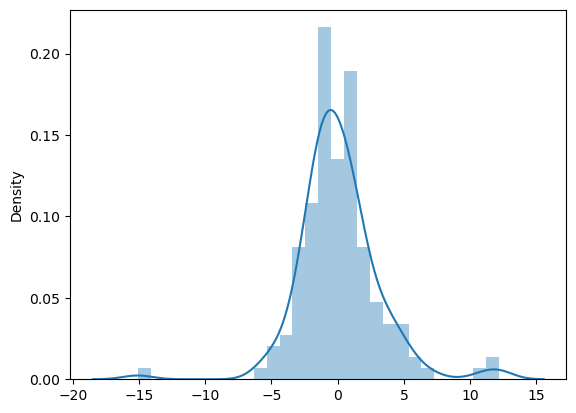

In [19]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [20]:
filename = open('hpmodel.pkl', 'wb')
pickle.dump(forest,filename )

In [21]:
filename.close()